<a href="https://colab.research.google.com/github/umiaisyah-24001380/data-science-toolkit/blob/main/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

In [4]:
path = "/content/drive/MyDrive/data_science_assignment/Data-science-assignment/train.csv"

In [5]:
# Load the dataset
df = pd.read_csv(path)

In [6]:
# Checking the information of the loaded dataset
print("--- COLUMN TYPES AND NULL COUNTS ---")
df.info()

--- COLUMN TYPES AND NULL COUNTS ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
print("\n--- EXACT COUNT OF MISSING VALUES ---")
print(df.isnull().sum())


--- EXACT COUNT OF MISSING VALUES ---
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [8]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [10]:
df.describe(include = 'all')
#.describe() only analyzes numeric columns by default, so 'all' had to be added so that we can analyze categorical data as well

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002990,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [11]:
# Married column i have decided not to rename to Status to tidy it because it will be redundant since theres only 2 status eiter youre married or single.It can be classified as a simple yes or no
df.rename(columns={
    'Gender': 'gender',
    'Married': 'married',
    'Dependents': 'dependents',
    'Education': 'education',
    'Self_Employed': 'self_employed',
    'ApplicantIncome': 'applicant_income',
    'CoapplicantIncome': 'coapplicant_income',
    'LoanAmount': 'loan_amount',
    'Loan_Amount_Term': 'loan_amount_term',
    'Credit_History': 'credit_history',
    'Property_Area': 'property_area',
    'Loan_Status': 'loan_status'
}, inplace=True)

print(df.columns)

Index(['Loan_ID', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicant_income', 'coapplicant_income',
       'loan_amount', 'loan_amount_term', 'credit_history', 'property_area',
       'loan_status'],
      dtype='object')


In [12]:
# in this cell im going to drop useless columns that we dont need for our assignment,EDA,Feature engineering and finally model training.
#ill explain the reasoning for each column drop
#1.Loan_ID is not needed for the model because it has no significance in this project,its just serves as the number of rows and we dont need it
#2.Gender can cause biaseness in data and our model outcome because these days both women and men are equal and loan eligibility is not defined by the gender. (SMART question)
#3.Married column because primarily married status doesnt affect the eligibility of getting loan,only "applicant_income,coapplicant_income and number_of_dependents matters" because they determine your eligibility of getting a loan and we have that columns so we dont need Married.
#Reference for Married SMART approach : https://www.rocketlawyer.com/family-and-personal/family-matters/marriage/legal-guide/how-marital-status-affects-credit-card-and-loan-applications ,https://www.lionsgatefinancialgroup.ca/can-marital-status-affect-loan-eligibility/#:~:text=In%20conclusion%2C%20while%20marital%20status%20may%20have%20some,financial%20stability%2C%20and%20ability%20to%20repay%20the%20loan

In [13]:
df = df.drop(['Loan_ID', 'gender', 'married'], axis=1)

In [14]:
df.isnull().sum()
#from this code we notice that after updating,we still hae missing values in some of the columns

,0
dependents,15
education,0
self_employed,32
applicant_income,0
coapplicant_income,0
loan_amount,22
loan_amount_term,14
credit_history,50
property_area,0
loan_status,0


In [15]:
#Since the null values for categorical column which is 'self_employed'and 'dependent' column is not more than 15 and 32 respectively,lets take the approach of filling them with the Mode (most frequent value to be safe).
#Now we calculate the mode which is most frequent value in the column
self_employed_mode_value = df['self_employed'].mode()[0]
dependents_mode_value = df['dependents'].mode()[0]
# Assign the filled version immediately back to the column (No inplace=True) because inplace creates a copy in newer versions of pandas
df['self_employed'] = df['self_employed'].fillna(self_employed_mode_value)
df['dependents'] = df['dependents'].fillna(dependents_mode_value)

In [16]:
df.describe(include = 'all')
#from this we can see that dependents and self_employed column count has increased to 614 showing that all rows has been filled

,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
count,614,614,614,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,360,480,532,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [17]:
#Now we handle numerical data columns
print(df.isnull().sum())
#There is 3 numerical columns that has missing values which are "loan_amount,loan_amount_term and credit_history"

dependents             0
education              0
self_employed          0
applicant_income       0
coapplicant_income     0
loan_amount           22
loan_amount_term      14
credit_history        50
property_area          0
loan_status            0
dtype: int64


In [18]:
df['dependents'].value_counts()
# From this we can see that there is 3+ as value this is not considered an integer by the computer because it has '+' character in it so its considered a string and we must handle it by formatting it.

,count
dependents,
0,360
1,102
2,101
3+,51


In [19]:
#we replace 3+ into 4's for easy machine readibility
df = df.replace(to_replace = '3+', value = 4)

In [20]:
print(df['dependents'].dtype)

object


In [21]:
#dependent columns datatype is still object so we change it to int
#Convert from Object (String) to Integer
df['dependents'] = df['dependents'].astype(int)

In [22]:
print(df['dependents'].dtype)

int64


In [23]:
df['dependents'].value_counts()

,count
dependents,
0,360
1,102
2,101
4,51


In [24]:
df.isnull().sum()

,0
dependents,0
education,0
self_employed,0
applicant_income,0
coapplicant_income,0
loan_amount,22
loan_amount_term,14
credit_history,50
property_area,0
loan_status,0


In [25]:
#1.we are going to fill missing values in loan_amount column with the median because this column is a continuous numerical data and may contain outliers.So for safe we take the median approach.Through this approach,we can avoid outliers (rich people) skewing the data.
#2.for loan-credit_amount we can proceed with mode because it is discrete numerical data.
#3.for credit history since it has only 2 value either 0.0 or 1.0,it acts as a binary value for yes or no.
loan_amount_median_value = df['loan_amount'].median()
df['loan_amount'] = df['loan_amount'].fillna(loan_amount_median_value)

# Fill Loan_Amount_Term with the Mode
loan_amount_term_mode_value = df['loan_amount_term'].mode()[0]
df['loan_amount_term'] = df['loan_amount_term'].fillna(loan_amount_term_mode_value)

# Fill Credit_History with the Mode
credit_history_mode_value = df['credit_history'].mode()[0]
df['credit_history'] = df['credit_history'].fillna(credit_history_mode_value)

In [26]:
df.describe(include = 'all')
#this code shows that all the missing values of this dataset has been filled

,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
count,614.000000,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,NaN,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,NaN,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,NaN,480,532,NaN,NaN,NaN,NaN,NaN,233,422
mean,0.827362,NaN,NaN,5403.459283,1621.245798,145.752443,342.410423,0.855049,NaN,NaN
std,1.212833,NaN,NaN,6109.041673,2926.248369,84.107233,64.428629,0.352339,NaN,NaN
min,0.000000,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,0.000000,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,0.000000,NaN,NaN,3812.500000,1188.500000,128.000000,360.000000,1.000000,NaN,NaN
75%,1.000000,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN


In [27]:
df.isna().sum()
# no more missing values,all of it has been handled

,0
dependents,0
education,0
self_employed,0
applicant_income,0
coapplicant_income,0
loan_amount,0
loan_amount_term,0
credit_history,0
property_area,0
loan_status,0


In [28]:
new_file_path = "cleaned_loan_dataset.csv"
df.to_csv(new_file_path,index=False)

In [29]:
# 1. Add TotalIncome column
df['TotalIncome'] = df['applicant_income'] + df['coapplicant_income']

# 2. Add Log columns to normalize the data
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['loan_amount_log'] = np.log(df['loan_amount'])

In [30]:
df = df.drop(['loan_amount'], axis=1)

In [31]:
df.head()

,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount_term,credit_history,property_area,loan_status,TotalIncome,TotalIncome_log,loan_amount_log
0,0,Graduate,No,5849,0.0,360.0,1.0,Urban,Y,5849.0,8.674026,4.852030
1,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,N,6091.0,8.714568,4.852030
2,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,Y,3000.0,8.006368,4.189655
3,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,Y,4941.0,8.505323,4.787492
4,0,Graduate,No,6000,0.0,360.0,1.0,Urban,Y,6000.0,8.699515,4.948760


<Axes: >

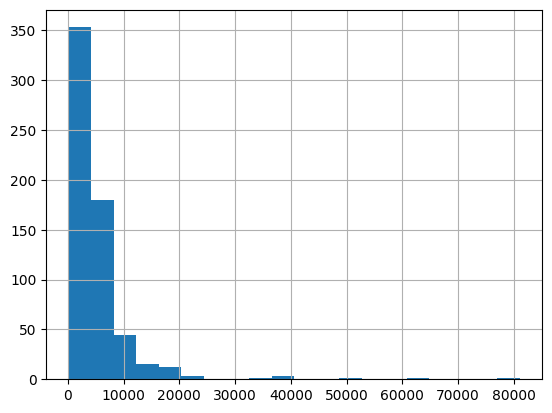

In [32]:
# Visualize the distribution of Applicant Income
df['applicant_income'].hist(bins=20)

In [33]:
# Combine Applicant and Coapplicant income into one feature
df['TotalIncome'] = df['applicant_income'] + df['coapplicant_income']

<Axes: >

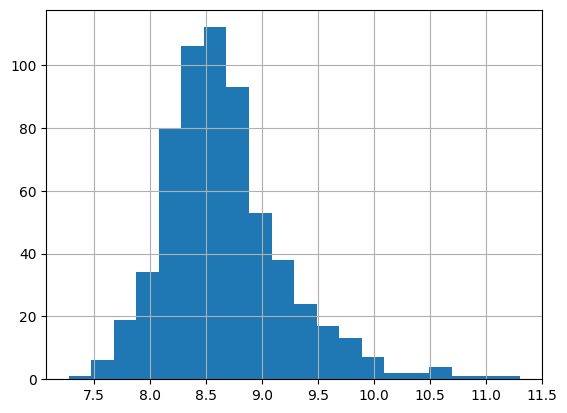

In [34]:
# Apply log transformation to normalize the distribution
df['TotalIncome_log'] = np.log(df['TotalIncome'])

# Now this line will work without error:
df['TotalIncome_log'].hist(bins=20)

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# List of categorical columns to encode
cols = ['education', 'self_employed', 'property_area', 'loan_status']

for col in cols:
    df[col] = le.fit_transform(df[col])

df.head()

,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount_term,credit_history,property_area,loan_status,TotalIncome,TotalIncome_log,loan_amount_log
0,0,0,0,5849,0.0,360.0,1.0,2,1,5849.0,8.674026,4.852030
1,1,0,0,4583,1508.0,360.0,1.0,0,0,6091.0,8.714568,4.852030
2,0,0,1,3000,0.0,360.0,1.0,2,1,3000.0,8.006368,4.189655
3,0,1,0,2583,2358.0,360.0,1.0,2,1,4941.0,8.505323,4.787492
4,0,0,0,6000,0.0,360.0,1.0,2,1,6000.0,8.699515,4.948760


In [36]:
df.to_csv("post_feature_engineering.csv")